<a href="https://colab.research.google.com/github/merlinkalokerinos/Studies-OAMK/blob/main/Machine_learning_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import os # u.a. zur Entwicklung plattformübergreifender Systempfade
import yaml # für Konfigurationen
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung


In [95]:
import pandas as pd 
df = pd.read_csv('leonasci3.csv', encoding='latin-1')
df.head(100)

,Straße-Stadtteil-Stadt,Kaufpreis,Zimmeranzahl,Quadratmeter,geolocation
0,"Dom Pedro, München",522500.0,2.0,51.00,"Dom Pedro, Neuhausen-Nymphenburg, München, Bay..."
1,"Haidhausen Nord, München",1498000.0,4.0,120.00,"Haidhausen-Nord, Haidhausen - Nord, Au-Haidhau..."
2,"Düsseldorfer Straße 7, Am Luitpoldpark, München",849900.0,3.0,79.00,"Schwabinger Sauna, 7, Düsseldorfer Straße, Am ..."
3,"Am Riesenfeld, München",455000.0,2.0,57.20,"Am Riesenfeld, Milbertshofen-Am Hart, München,..."
4,"Am Luitpoldpark, München",750000.0,3.0,75.00,"Am Luitpoldpark, Schwabing-West, München, Baye..."
...,...,...,...,...,...
95,"Clemensstraße 120, Am Luitpoldpark, München",749000.0,2.0,58.00,"120, Clemensstraße, Am Luitpoldpark, Schwabing..."
96,"Universität, München",379900.0,1.0,25.00,"Universität, Ludwigstraße, Schönfeldvorstadt, ..."
97,"Untersendling, München",699000.0,2.0,67.18,"Untersendling, Stemmerhof, Sendling, München, ..."
98,"Schwanthalerhöhe (Ortsteil), München",759000.0,3.0,76.22,NaN


In [96]:
# wie viele Datenpunkte haben nicht-vollständige Attribute?
num_missing = len(df) - len(df.dropna())
ratio_missing = num_missing / len(df) 
# wir konvertieren in Prozente und runden auf 3 Nachkommastellen
ratio_missing = np.round(ratio_missing * 100, 3) 
print(f"{ratio_missing}% der Daten ({num_missing} Punkte) haben fehlende Werte!")

2.47% der Daten (29 Punkte) haben fehlende Werte!


In [97]:
df.loc[df.isnull().sum(axis=1) == 1] # ein kleiner Trick zum anzeigen von Daten mit fehlenden Attributen

,Straße-Stadtteil-Stadt,Kaufpreis,Zimmeranzahl,Quadratmeter,geolocation
15,"Leopoldstraße 169, Münchner Freiheit, München",826000.0,2.0,66.15,NaN
32,"Parkstraße 15, Schwanthalerhöhe (Ortsteil), Mü...",385000.0,2.0,50.13,NaN
57,"Leopoldstr. 109, Münchner Freiheit, München",498000.0,1.0,40.00,NaN
85,"Niemöllerallee 24, Altperlach, München",1240000.0,4.0,120.51,NaN
88,"Trudering-Riem (Ortsteil), München",215000.0,1.0,18.18,NaN
98,"Schwanthalerhöhe (Ortsteil), München",759000.0,3.0,76.22,NaN
270,"Trudering-Riem (Ortsteil), München",825000.0,4.0,93.78,NaN
285,"Leopoldstrasse 108, Münchner Freiheit, München",1150000.0,3.0,87.00,NaN
343,"Ungererstr. 82, Münchner Freiheit, München",975000.0,2.5,81.00,NaN
373,"Trudering-Riem (Ortsteil), München",315000.0,1.0,35.40,NaN


In [98]:


df.isnull().sum(axis=0)



Straße-Stadtteil-Stadt     0
Kaufpreis                  0
Zimmeranzahl               0
Quadratmeter               0
geolocation               29
dtype: int64

In [123]:
derived_df = df[['Kaufpreis']]
print(derived_df, "\n")

      Kaufpreis
0      522500.0
1     1498000.0
2      849900.0
3      455000.0
4      750000.0
...         ...
1140   595000.0
1141   252000.0
1142   246000.0
1143   270000.0
1144   268000.0

[1145 rows x 1 columns] 



In [99]:


df = df.dropna() # löscht alle Zeilen mit fehlenden Attributen
df = df.reset_index(drop=True) # zählt unsere Daten neu durch



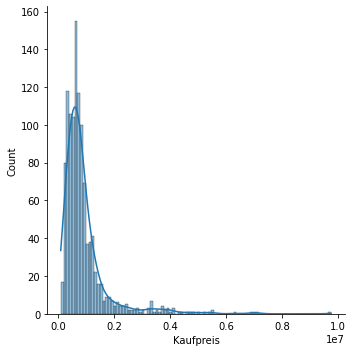

In [112]:


sns.displot(data=df, x="Kaufpreis", kde=True);


In [101]:


description = df.describe()
description



,Kaufpreis,Zimmeranzahl,Quadratmeter
count,1.145000e+03,1145.000000,1145.000000
mean,9.134174e+05,2.646288,80.059424
std,8.607107e+05,1.446223,50.515588
min,1.000000e+05,1.000000,16.640000
25%,4.740000e+05,2.000000,49.000000
50%,6.900000e+05,3.000000,72.120000
75%,9.950000e+05,3.000000,94.000000
max,9.760000e+06,18.000000,473.000000


In [102]:
avgkaufpreis = df["Kaufpreis"].mean()

In [103]:


bins = [0] + list(description["Kaufpreis"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins) # 0 bis 119.500 = 0 - 25% Quantil, 119.500 bis 179.700 = 25 - 50% Quantil, ...



[0, 474000, 690000, 995000, inf]


In [104]:


df["house_cat"] = pd.cut(
    df["Kaufpreis"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)



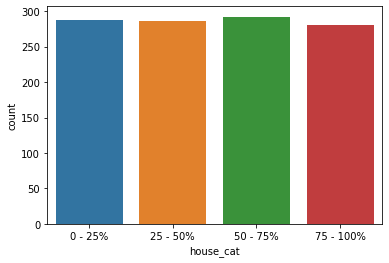

In [105]:


sns.countplot(data=df, x="house_cat");



In [106]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

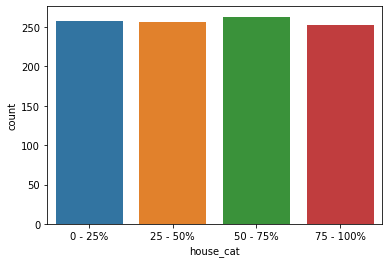

In [107]:


sns.countplot(data=df_train, x="house_cat");



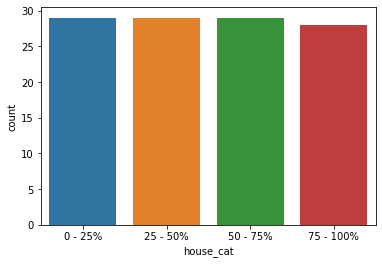

In [108]:


sns.countplot(data=df_test, x="house_cat");



In [109]:


df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)





```

```

# Correlation calculation

In [127]:
df_train.corr()["Kaufpreis"].abs().sort_values(ascending=False)

Kaufpreis       1.000000
Quadratmeter    0.860481
Zimmeranzahl    0.604973
Name: Kaufpreis, dtype: float64

In [129]:
def engineer_features(df):
    df["ratio_rooms"] = df["Quadratmeter"] / df["Zimmeranzahl"]
    return df

In [132]:


df_train = engineer_features(df_train)
df_test = engineer_features(df_test)



In [133]:

df_train.corr()["Kaufpreis"].abs().sort_values(ascending=False)



Kaufpreis       1.000000
Quadratmeter    0.860481
Zimmeranzahl    0.604973
ratio_rooms     0.530522
Name: Kaufpreis, dtype: float64